In [176]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

filterwarnings("ignore")
plt.style.use("default")

## Цель работы

Ознакомиться с основными приемами работы с категориальными атрибутами в датасетах для машинного обучения.

## Содержание работы

1. Загрузите прилагаемые к этой работе два датасета - Титаник и Customer support. Выведите основную информацию по каждому датасету и сделайте выводы.
2. Визуализируйте распределение каждого категориального признака в датасете Customer support. Учитывайте количество уникальных значений.
3. Исследуйте связь каждого признака датасета Customer support с целевой переменной. Сделайте предварительный вывод о значимости признаков.
4. Где целесообразно, проведите укрупнение категорий, путем объединения разных значений в столбце.
5. Добавьте к датасету новый столбец, содержащий агрегированную информацию, которая предположительно будет полезна для моделирования целевой переменной.
6. Заполните отсутствующие значения в датасете.
7. На примере датасета Титаник проведите преобразование категориальных переменных разных шкал в численные.
8. В датасете Customer support удалите лишние столбцы и преобразуйте все категориальные переменные через get_dummies()
   Методические указания


## Первоначальное знакомство с данными

Для данной работы мы будем использовать два датасета. Один из них - Титаник - нам уже хорошо знаком. Поэтому начнем с другого набора данных - Customer Support. Это датасет, который мы собирали на одной из предыдущих работ. Можно воспользоваться вашей версией, которая получилась при выполнении той работы, либо использовать файл, прилагающийся в этом репозитории. Как всегда прочитаем файл и выведем первые строки:


In [67]:
CS_data = pd.read_csv(
    "https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/Customer_support_data.csv"
)
CS_data.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


Сейчас нас интересует тот факт, что в датасете большое количество категориальных атрибутов. Еще присутствуют даты и пара численных колонок, но с ними мы не будем разбираться в этой работе. При этом целевая переменная - оценка удовлетворенности - является численной. То есть перед нами датасет для задачи регрессии. Хотя, можно целевую переменную воспринимать и как классификацию, это вопрос интерпретации.


Основная информация о колонках показывает, что в датасете есть большое количество пропусков. Также видим общую информацию о форме набора данных:


In [68]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

Как обычно, после визуального ознакомления с данными, нам нужно вывести статистическую информацию об атрибутах. Но так как по умолчанию функция describe описывает только численные столбцы, необходимо специально указать, что нас интересует информация по всем колонкам таблицы:


In [69]:
CS_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


Данная инструкция выводит уже знакомую нам статистическую информацию по численным колонкам, а по категориальным (то есть, технически - текстовым) выводит количество заполненных значений, количество уникальных значений, модальное значение и частоту этого самого вероятного значения:


Самое полезное в этой таблице - соотношение количества уникальных к общему количеству значений по колонке. Если они совпадают или близки, это значит, что в атрибуте все или почти все значения разные. В таком случае стоит задуматься о его удалении, либо преобразовании. Также важно количество самого вероятного значения: этот показатель дает информацию о дисбалансе значений. Но более подробную информацию можно получить из анализа распределения атрибута.

Описательную статистику по датасету Титаник приведем еще в более компактном виде:


In [70]:
T_data = pd.read_csv(
    "https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/titanic.csv"
)


In [71]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,491,1,577,7,4,644


Здесь явно видно, например, что имя - полностью уникальный атрибут. А вот в одной каюте могло находиться до четырех человек. Что удивительно, номера билетов почему-то тоже повторяются.

Обратите внимание на то, как в нашем варианте этого датасета обозначается класс обслуживания: названием, а не числом. Это нам понадобится позднее.

Визуализация распределения атрибутов и связь с целевой переменной
Для визуализации распределения категориальных атрибутов воспользуемся самым простым инструментом - гистограммой. Построим гистограмму распределения первого существенного атрибута.


Обратите внимание, что категории на гистограмме располагаются в порядке упоминания в данных. Когда их много, это может быть неудобно. На гистограмме видна неравномерность распределения - объектов одной категории сильно больше, чем других:


<Axes: xlabel='channel_name', ylabel='Count'>

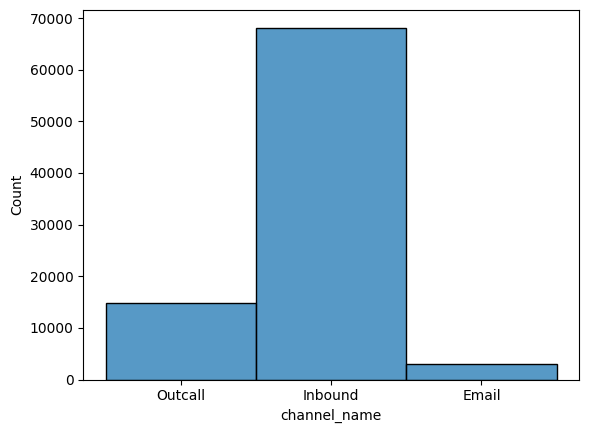

In [72]:
sns.histplot(data=CS_data, x="channel_name")

Это уже информацию можно вывести в табличном виде. Для подсчета количества объектов со всеми возможными вариантами значения по определенной колонке в pandas существует специальная функция.


Можно просто вывести эту информацию в виде серии. Обратите внимание, что функция сразу и ранжирует категории в порядке убывания частот:


In [73]:
CS_data.channel_name.value_counts()

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64

In [74]:
# TODO Heatmap

Эту серию можно использовать, чтобы строить гистограммы, либо тепловые карты. Постройте тепловые карты по всем атрибутам самостоятельно.

Сразу же построим совместное распределение данного признака и целевой переменной. Так как признак категориальный, а целевая переменная - численная, мы можем построить на столбчатой диаграмме среднее значение целевой переменной для каждой категории:


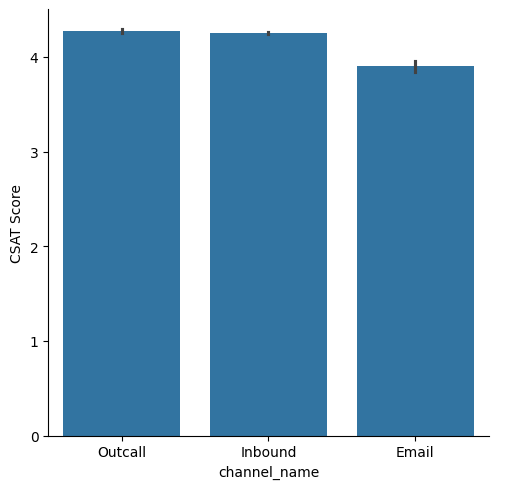

In [75]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

На графике видно, что средние значения для первый двух категорий отличаются несущественно, а по третьей - сильно ниже. Можно сделать вывод, что канал обращения влияет на потенциальную удовлетворенность клиента и обращения по электронной почте в среднем немного меньше нравятся клиентам.


Переходим к следующей категориальной переменной. Прежде чем строить гистограмму выведем таблицу значений:


In [76]:
CS_data.category.value_counts()

category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64

Если категорий очень много, таблицу значений читать проще, так как можно ограничиться анализом только самых распространенных значений. В данном случае значений не так много и можно построить гистограмму. Но мы построим ее по упорядоченному набору значений:


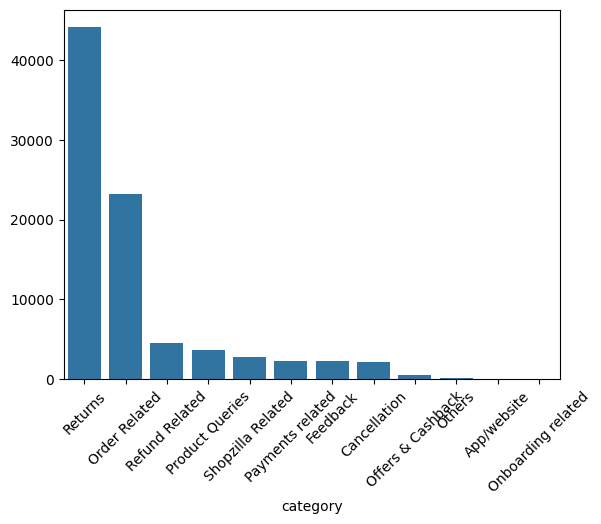

In [77]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()


Это дает нам более системное представление и соотношении частот разных категорий, когда категории упорядочены по этом частотам.


В данном случае, наблюдается типичный для таких распределений дисбаланс категорий. Присутствуют очень малочисленные категории. В таких случая стоит подумать над объединением категорий. Хотя представленный на графике случай еще далеко не самый экстремальный.


Теперь выведем среднее значение удовлетворенности в зависимости от значения данного признака:


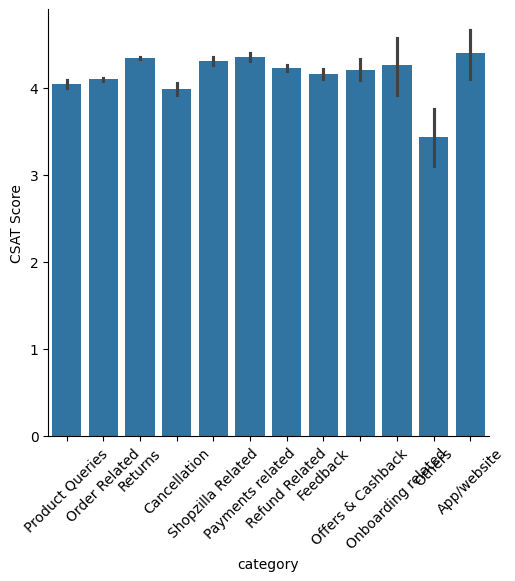

In [78]:
sns.catplot(data=CS_data, x="category", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()


Можем видеть наличие влияния: есть разница между средним значением целевой переменной для разных категорий. При этом есть категория, которой соответствует очень низкое значение удовлетворенности. Из этой аналитики тоже можно сделать значимые выводы.

Теперь визуализируем распределение по подкатегориям. Заметно, что при увеличении количества категорий анализ становится проводить затруднительно:

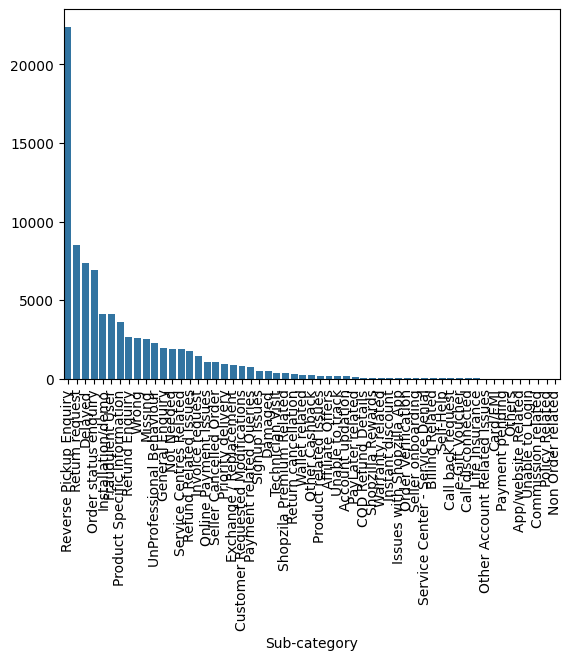

In [79]:
counts = CS_data["Sub-category"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()


Но в целом, мы видим такое же характерное распределение - очень популярное значение и большое количество редких разных значений. Такие объемные распределения как раз более удобно анализировать в виде таблицы, так как можно вывести первые несколько строк:

In [80]:
CS_data["Sub-category"].value_counts()[:10]

Sub-category
Reverse Pickup Enquiry          22389
Return request                   8523
Delayed                          7388
Order status enquiry             6922
Installation/demo                4116
Fraudulent User                  4108
Product Specific Information     3589
Refund Enquiry                   2665
Wrong                            2597
Missing                          2556
Name: count, dtype: int64

Визуализация совместного распределения с целевой переменной тоже выглядит довольно страшно:

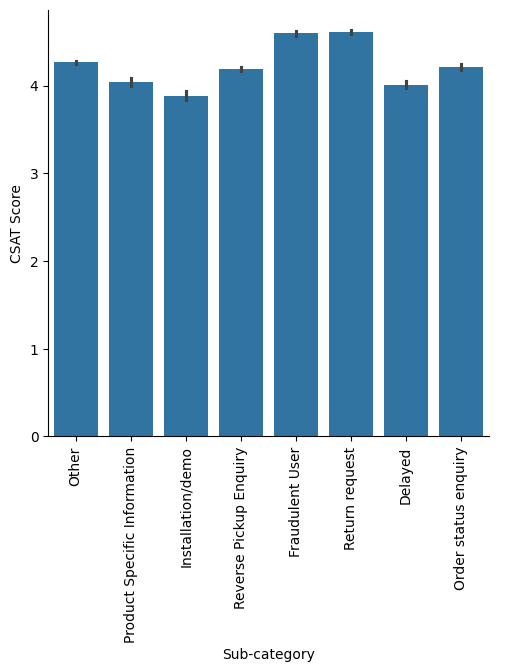

In [130]:
sns.catplot(data=CS_data, x="Sub-category", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()

Казалось бы, по этому графику ничего нельзя понять. Но можно сделать вывод: чем менее популярное значение, там больше дисперсия (обозначенная на графике черной вертикальной линией) целевой переменной. Этого и следовало ожидать.

Теперь выведем информацию о столбце "Customer remarks". Так как это текст в свободной форме, и присутствует очень большое количество значений, нет смысла выводить гистограмму. Лучше как раз при помощи таблицы посмотреть несколько самых популярных значений:

In [82]:
CS_data["Customer Remarks"].value_counts()[:20]

Customer Remarks
Good             1390
Good             1158
Very good         569
Nice              316
Thanks            276
Ok                259
No                258
Thank you         244
Nice              239
Very good         236
Excellent         171
Thanks            159
Good ??           148
Good service      133
Very nice         122
Thank you          97
??                 95
Nothing            88
5                  76
Good job           71
Name: count, dtype: int64

Помним, что по этому полю присутствует большое количество пропущенных значений. Можем сделать вывод, что если отзыв присутствует, то с большой долей вероятности он положительный. Поэтому на будущее заметим, что этот атрибут будет логично бинаризовать.

Распределение по городам тоже выведем в виде таблицы:

In [83]:
CS_data["Customer_City"].value_counts()[:20]

Customer_City
HYDERABAD      722
NEW DELHI      688
PUNE           435
MUMBAI         406
BANGALORE      352
CHENNAI        271
KOLKATA        270
LUCKNOW        254
AHMEDABAD      253
JAIPUR         243
GURGAON        215
PATNA          199
SURAT          175
ALLAHABAD      161
KANPUR         138
VARANASI       137
THANE          129
GHAZIABAD      120
BHUBANESWAR    117
VADODARA       105
Name: count, dtype: int64

Но чтобы хоть как-то понять общую форму распределения, все-таки изобразим гистограмму:

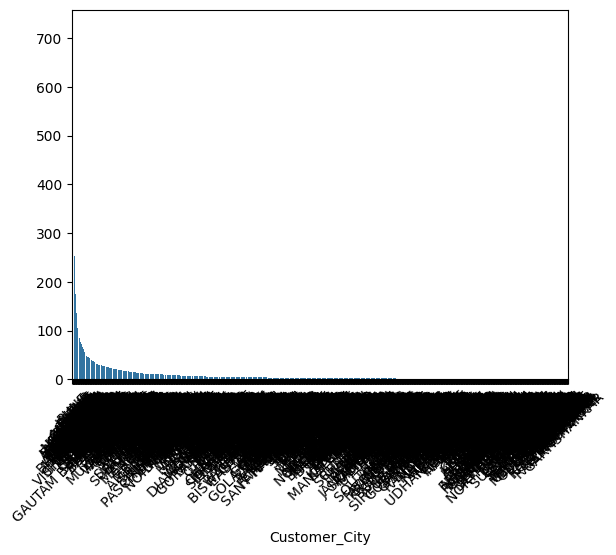

In [84]:
counts = CS_data["Customer_City"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

Явно наблюдается экспоненциальное распределение. Несколько очень популярных городов и огромное количество очень редких. Хотя, глядя на таблицу, складывается ощущение, что частоты падают довольно плавно.

Распределение по продуктовой категории не такое экстремальное. Конечно, есть более и менее популярные категории, но в целом дисбаланс не такой выраженный:

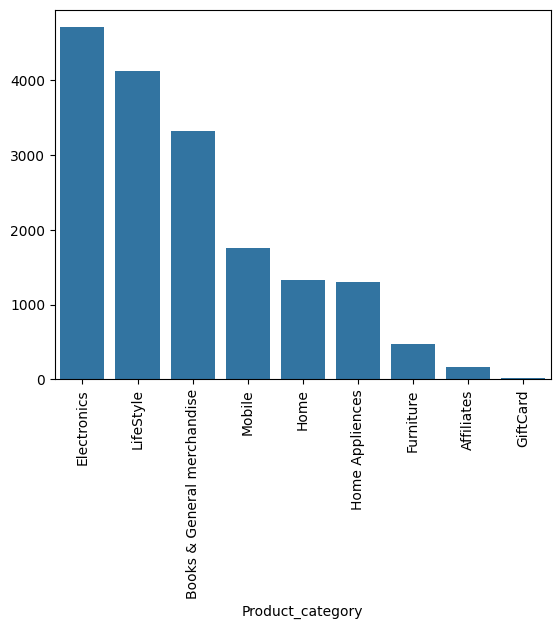

In [85]:
counts = CS_data["Product_category"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()


А вот влияние на целевую переменную здесь не очень очевидно:


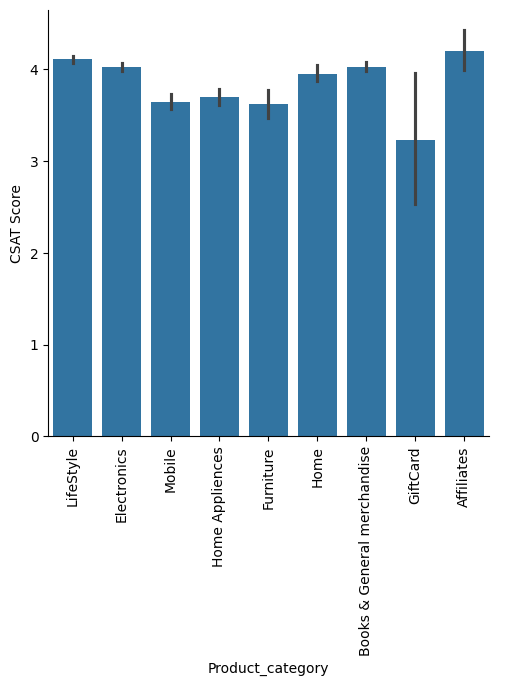

In [86]:
sns.catplot(data=CS_data, x="Product_category", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()


Распределение по операторам опять же выведем только в виде первых строк таблицы. Видим, что значений очень много и распределены они неравномерно:

In [87]:
CS_data["Agent_name"].value_counts()[:20]

Agent_name
Wendy Taylor           429
Timothy Huff           265
David Smith            264
Jamie Smith            253
Kayla Wilson           216
Julie Williams         200
Mrs. Jennifer Stone    200
Sharon Bullock         195
Matthew White PhD      192
Anthony Booth          177
Tina Harrington        177
Kristin Campbell       176
Brianna Wolf           176
Rebecca Walker         176
Jennifer Hernandez     174
Rebecca Graham         173
William Carey DVM      169
Ryan Thompson          167
Brandon Frost          161
Brian Young            160
Name: count, dtype: int64

Руководителей операторов меньше. На гистограмме видно, что дисбаланс присутствует, но не очень яркий:

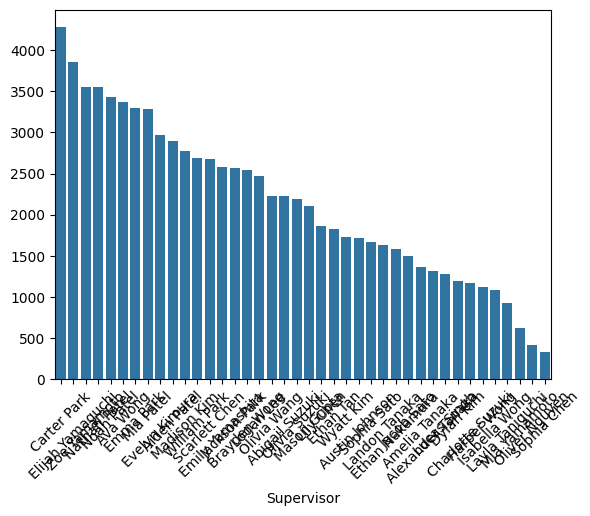

In [88]:
counts = CS_data["Supervisor"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()


При этом явны различия в средней оценке для разных руководителей:

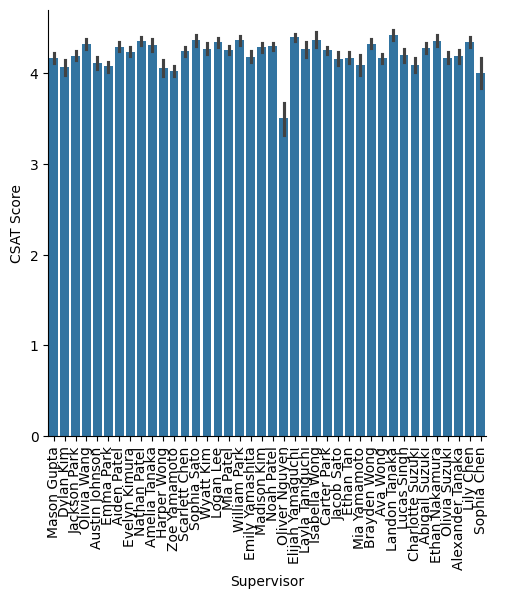

In [89]:
sns.catplot(data=CS_data, x="Supervisor", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()


Наверняка есть такие же различия и по операторам, нона графике это увидеть довольно сложно. Попробуйте самостоятельно создать серию, где индексом будет имя оператора, а значением - средняя оценка удовлетворенности. Посчитайте статистику по этой серии.

Количество менеджеров еще меньше и картина похожая на руководителей:

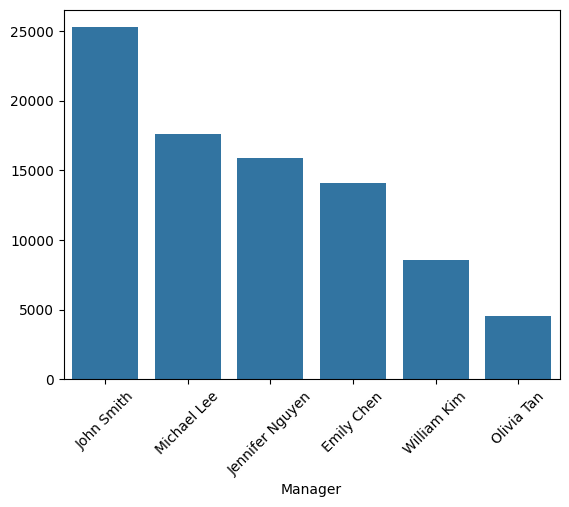

In [90]:
counts = CS_data["Manager"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()


Но различия в целевой переменной у разных менеджеров не такое явное. Видимо, это уже слишком крупная группировка и все различия усредняются:



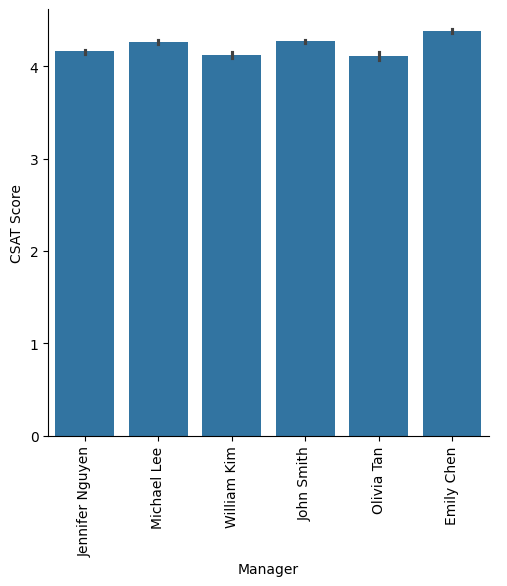

In [91]:
sns.catplot(data=CS_data, x="Manager", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()


Распределение по типам контракта тоже не вызывает особых вопросов. Преобладают либо долгосрочные контракты, либо сотрудники на обучении:

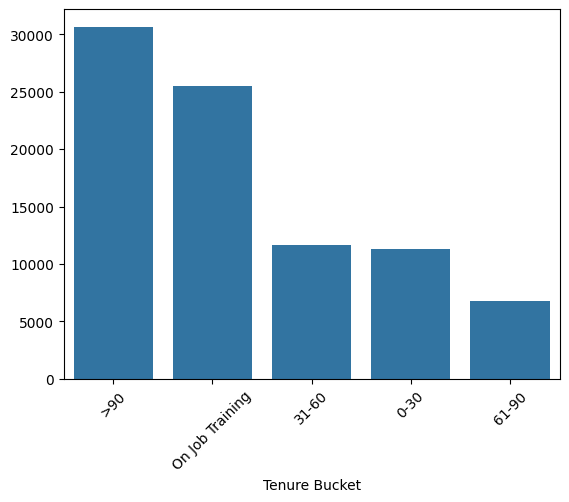

In [92]:
counts = CS_data["Tenure Bucket"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()


При этом у стажеров средняя оценка совсем незначительно ниже, чем у других категорий, по стальным значимых различий нет:

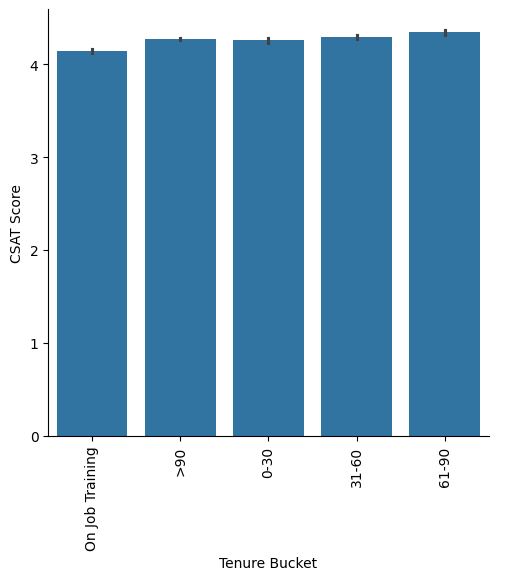

In [93]:
sns.catplot(data=CS_data, x="Tenure Bucket", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()


По типам смен явно преобладают классические утренние и вечерние смены, гибридные варианты достаточно редки:

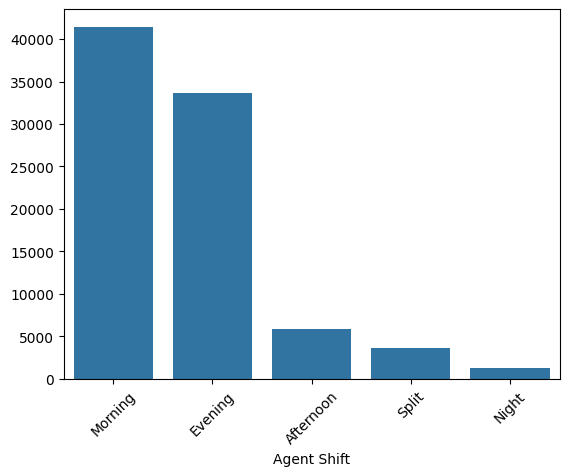

In [94]:
counts = CS_data["Agent Shift"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()


Есть небольшая вариация в средних значениях удовлетворенности, но ничего особенно примечательного:

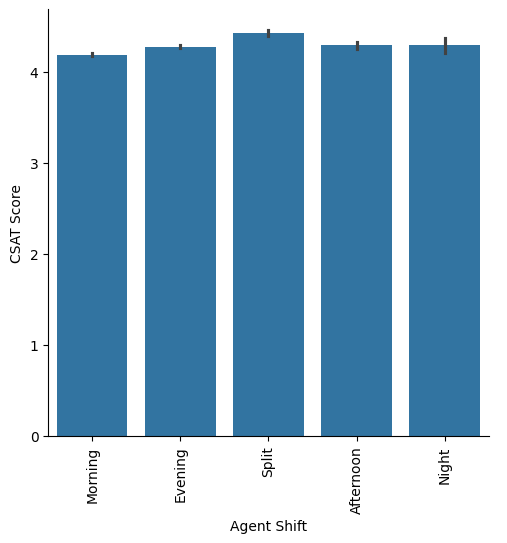

In [95]:
sns.catplot(data=CS_data, x="Agent Shift", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()


В целом, анализ признаков дал нам некоторую информацию о возможных способах преобразования категориальных переменных, чем мы сейчас и займемся. Для более детального анализа влияния атрибутов на целевую переменную в данном случае понадобится дополнительный анализ. Его мы освоим в одной из следующих работ.

Укрупнение категорий

При преобразовании категориальных данных основной проблемой зачастую является то, что при кодировании атрибута с большим количеством значений по методу One-Hot в результате может получиться слишком много столбцов, что вредно как для потенциального переобучения модели, так и не очень эффективно с плане вычислительных ресурсов.

Поэтому при возможности можно постараться укрупнить категории, то есть объединить близкие по смыслу значения атрибута. Посмотрим, например, на отзывы клиента. При анализе мы уже пришли к выводу, что если отзыв присутствует, то он скорее всего положительный. Поэтому можно бинаризировать этот атрибут - если отзыв есть, ставим 1, если нет - 0.

В данном случае мы проверяем длину строки, чтобы отсечь пустые отзывы, часть их которых обозначена в данных как "NAN". При желании можно совершить более подробную обработку данных. И как всегда советуем создавать новые столбцы:

In [96]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(
    int
)


Точно также можно бинаризировать и наличие заказа:

In [97]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)

Дополнительным плюсом такого метода обработки является то, что мы заодно и избавляемся от пропусков в данных:

In [98]:
CS_data["Is_order"]

0        0
1        0
2        0
3        0
4        0
        ..
85902    0
85903    0
85904    0
85905    0
85906    0
Name: Is_order, Length: 85907, dtype: int32

А вот с другими категориальными переменным так просто уже не поступишь. Например, подкатегория обращения. Здесь мы видим большое количество малопопулярных значений. Часто в такой ситуации можно объединить редкие значения в одно, "Иное". Можно сделать это, например, так:

In [99]:
CS_data.loc[
    ~CS_data["Sub-category"].isin(
        [
            "Reverse Pickup Enquiry",
            "Return request",
            "Delayed",
            "Order status enquiry",
            "Installation/demo",
            "Fraudulent User",
            "Product Specific Information",
        ]
    ),
    "Sub-category",
] = "Other"


Здесь мы явно перечисляем самые популярные категории. Но можно сделать и автоматическое переименование, например, по порогу количества значений. Можете поэкспериментировать с этим самостоятельно. А мы пока заметим, что новое значение стало вторым по популярности в столбце:

In [100]:
CS_data['Sub-category'].value_counts()

Sub-category
Other                           28872
Reverse Pickup Enquiry          22389
Return request                   8523
Delayed                          7388
Order status enquiry             6922
Installation/demo                4116
Fraudulent User                  4108
Product Specific Information     3589
Name: count, dtype: int64

Объединение редких значений - отличный способ радикально сократить количество столбцов в датасете после кодирования номинальных признаков. Однако, нужно проверять эффективность данного приема на метриках, и выбирать такое объединение, которое как можно меньше вредит эффективности модели. Как правило, чем больше значений мы объединяем, тем больше потери информации и потенциальное снижение качества модели.

## Добавление агрегированной информации

При работе с категориальными переменными с большим количеством значений часто бывает полезно рассмотреть добавление агрегированной информации к данным вместо самой категориальной переменной. Например, можно вместо имени оператора технической поддержки добавить колонку, отражающую загруженность данного оператора. Вполне логично выдвинуть гипотезу о том, что загруженность оператора влияет на качество его работы и, как следствие, на удовлетворенность клиентов.

Можно вывести информацию о количестве записей в колонке, сгруппированных по имени оператора:



In [101]:
CS_data.groupby(["Agent_name"]).agg({"Agent_name": "count"})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


Это информация нам нужна для проверки предположения о том, что у операторов существенно различается загрузка.

А для того, чтобы добавить колонку с количеством клиентов у соответствующего операторам можно вот так скомбинировать несколько функций pandas:

In [102]:
CS_data["Agent_count"] = CS_data.groupby(["Agent_name"])["Agent_name"].transform(
    "count"
)

In [103]:
CS_data.groupby(["Agent_name"])["Agent_name"].apply("count")


Agent_name
Aaron Edwards       93
Aaron Romero        59
Abigail Gonzalez    25
Adam Barnett        56
Adam Hammond        60
                    ..
Yesenia Bowers      50
Zachary Collins     75
Zachary Ford        62
Zachary Reyes       55
Zachary Simpson     32
Name: Agent_name, Length: 1371, dtype: int64

В итоге мы получаем новый численный признак:

In [104]:
CS_data

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Other,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,...,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0,42
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,...,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0,32
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,...,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0,35
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,...,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0,48
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Other,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,...,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Other,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,...,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4,0,0,128
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Other,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,...,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5,1,0,75
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,...,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5,1,0,31
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,Other,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,...,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4,0,0,48


Точно так же можно поступить и с количеством операторов у одного руководителя. Но теперь нам понадобится другая агрегирующая функция, так как значения имени оператора могут повторяться:

In [105]:
CS_data.groupby(["Supervisor"]).agg({"Agent_name": "nunique"})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


По аналогии можем добавить эту информацию к исходному датасету:

In [106]:
CS_data["Sups_no_agents"] = CS_data.groupby(["Supervisor"])["Agent_name"].transform(
    "nunique"
)

В каждой задаче нужно оценивать необходимость использования агрегированной информации исходя из смысла атрибутов и предметной области. Но в целом это хороший источник новых данных и признаков, не увеличивающий кратно объемов датасетов.

## Заполнение отсутствующих значений
В отличие от численных атрибутов, заполнение пропусков в категориальных переменных значительно проще. В большинстве случаев наиболее адекватным будет заполнение неизвестных значений специальным:

In [107]:
CS_data["Product_category"] = CS_data["Product_category"].fillna("unknown")

Хотя, в некоторых случаях, применяют и заполнение модой, то есть самым распространенным значением. Эффективность конкретных способов нужно оценивать исходя из их влияния на метрики эффективности моделей.

В данном примере еще требуется заполнить пропуски в численном поле. Просто проиллюстрируем, что в особых случаях, численные переменные тоже можно заполнять специальными значениями:

In [108]:
CS_data["connected_handling_time"] = CS_data["connected_handling_time"].fillna("0")

Конечно это работает только в тех случаях, когда имеет предметный смысл.

## Преобразование бинарных атрибутов

Для иллюстрации методов преобразования категориальных переменных в численные нам больше подойдет второй датасет, прилагающийся к данной работе - Титаник. Подробное описание этого уже хорошо известного нам набора мы опустим. Важно, что он содержит категориальные переменные всех интересующих нас типов шкал.

Начнем с самого простого типа категориальных атрибутов - бинарных. Их можно преобразовывать как угодно. Самый компактный способ - LabelEncoder:

In [109]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

Этот способ кодирования просто заменяет значения атрибута на последовательные целые числа. В данном случае, 0 или 1 в произвольном порядке:



In [110]:
T_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,third,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,third,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,third,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


## Преобразование порядковых атрибутов

Порядковые атрибуты, то есть такие, значения которых можно сравнивать друг с другом, чаще всего приходится заменять с помощью вручную составленного словаря, чтобы соблюсти естественный порядок значений. Рассмотрим, например, класс обслуживания на Титанике. Его можно закодировать так:



In [111]:
T_data.Pclass.replace({"first": 1, "second": 2, "third": 3}, inplace=True)


После преобразования датасет выглядит следующим образом:

In [112]:
T_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Заметим, что такие атрибуты можно кодировать и следующим способом, который является самым универсальным. Но это сопряжено с излишними издержками по памяти.

## Преобразование номинальных атрибутов


Номинальные атрибуты, к которым относится большинство категориальных, можно преобразовывать только с использованием OneHotEncoder. Этот способ кодирования следует выбирать в случае сомнений в типе шкалы атрибута. Продемонстрируем работу этого кодировщика:

In [113]:
from sklearn.preprocessing import OneHotEncoder

OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[["Embarked"]])


array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

Как мы видим, интерфейс его работы схож с другимм классами для преобразования данных библиотеки sklearn.

Для формирования таблицы с преобразованными данными нам понадобится сформировать список названий колонок:

In [114]:
OH_embarked.get_feature_names_out(["Embarked"])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

Эту информацию мы передаем конструкторы датафреймов в качестве названий столбцов и так формируем преобразованные данные:

In [115]:
dummies = pd.DataFrame(
    OH_embarked.fit_transform(T_data[["Embarked"]]),
    columns=OH_embarked.get_feature_names_out(["Embarked"]),
    index=T_data.index,
)

Вот так выглядит сгенерированная таблица закодированных значений атрибута:

In [116]:
dummies.head()

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


На даном примере достаточно очевидна схема работы этого кодировщика. Они преобразует одну колонку с множеством значений в множество колонок с бинарными значениями.

В этом виде они готовы к объединению с исходным датафреймом:

In [117]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)

И в результате мы получаем датафрейм с увеличенным количеством колонок:

In [118]:
T_dummies.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,NaN,NaN,NaN,NaN
2,2.0,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,NaN,NaN,NaN,NaN
3,3.0,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,NaN,NaN,NaN,NaN
4,4.0,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,NaN,NaN,NaN,NaN,NaN


Помните, что использование этого кодировщика может существенно увеличить объем данных.

## Удаление лишних столбцов и массовое преобразование


Для финализации процедуры подготовки категориальных данных вернемся к первому датасету. На примере Титаника мы познакомились с подробным алгоритмом работы кодировщика OneHotEncoder. Из-за его универсальности, его часто применяют массово, на всех категориальных атрибутах, независимо от типа. Именно для этого в pandas и существует функция get_dummies().

Но перед ее применением необходимо сначала удалить из датасета все ненужные колонки, особенно категориальные. После преобразования это будет сделать уже не так просто. Мы сейчас удалим все лишние атрибуты произвольно. На практике для этого можно использовать анализ значимости атрибутов.

In [119]:
CS_dropped = CS_data.drop(
    [
        "Unique id",
        "Sub-category",
        "Customer Remarks",
        "Customer_City",
        "Agent_name",
        "Supervisor",
        "Order_id",
        "order_date_time",
        "Issue_reported at",
        "issue_responded",
        "Survey_response_Date",
        "Item_price",
    ],
    axis=1,
)


Наш датасет принимает более компактную форму:

In [120]:
CS_dropped.head()

,channel_name,category,Product_category,connected_handling_time,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
0,Outcall,Product Queries,unknown,0,Jennifer Nguyen,On Job Training,Morning,5,0,0,42,41
1,Outcall,Product Queries,unknown,0,Michael Lee,>90,Morning,5,0,0,32,17
2,Inbound,Order Related,unknown,0,William Kim,On Job Training,Evening,5,0,0,35,46
3,Inbound,Returns,unknown,0,John Smith,>90,Evening,5,0,0,48,28
4,Inbound,Cancellation,unknown,0,Michael Lee,0-30,Morning,5,0,0,124,29


Перед массовым преобразованием рекомендуем вывести основную статистику по категориальным колонкам еще раз, чтобы убедиться, что в датасете не осталось атрибутов с большим количеством значений:

In [121]:
CS_dropped.describe(include="all")

,channel_name,category,Product_category,connected_handling_time,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
count,85907,85907,85907,85907,85907,85907,85907,85907.000000,85907.000000,85907.000000,85907.000000,85907.000000
unique,3,12,10,212,6,5,5,NaN,NaN,NaN,NaN,NaN
top,Inbound,Returns,unknown,0,John Smith,>90,Morning,NaN,NaN,NaN,NaN,NaN
freq,68142,44097,68711,85665,25261,30660,41426,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.242157,0.319008,0.212230,82.733433,41.358690
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.378903,0.466095,0.408889,47.494745,15.862947
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,20.000000,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,0.000000,53.000000,29.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,0.000000,0.000000,75.000000,41.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,1.000000,0.000000,102.000000,55.000000


Зодно проверим, что заполнены либо удалены все пропуски в данных.

In [122]:
CS_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   channel_name             85907 non-null  object
 1   category                 85907 non-null  object
 2   Product_category         85907 non-null  object
 3   connected_handling_time  85907 non-null  object
 4   Manager                  85907 non-null  object
 5   Tenure Bucket            85907 non-null  object
 6   Agent Shift              85907 non-null  object
 7   CSAT Score               85907 non-null  int64 
 8   Customer Remarks New     85907 non-null  int32 
 9   Is_order                 85907 non-null  int32 
 10  Agent_count              85907 non-null  int64 
 11  Sups_no_agents           85907 non-null  int64 
dtypes: int32(2), int64(3), object(7)
memory usage: 7.2+ MB


Теперь одной инструкцией можно массово преобразовать все категориальные атрибуты в бинарные признаки по методу OneHotEncoder:

In [123]:
CS_dummies = pd.get_dummies(CS_dropped)

После этого преобразования количество столбцов в датасете может произвольно увеличиться. В данном случае мы проконтролировали этот процесс, но все равно получили в несколько раз больше колонок, чем было:

In [124]:
CS_dummies.shape

(85907, 258)

В реальности увеличение объема данных может быть еще более значительным. Если это нежелательно, нужно работать с категориальными переменными до преобразования, как мы показали в этой работе.

Теперь после такого преобразования данные полностью готовы к тому, чтобы их использовать в любой модели машинного обучения.

---
## Задания для самостоятельного выполнения
1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.

2. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.
3. Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки. Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).
4. Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.
5. Проверьте целесообразность каждого необязательного преобразования данных путем проверки, увеличивает ли данное преобразование точность модели. Проверьте на простом виде модели (линейная регрессия, дерево решений или случайный лес). Поэкспериментируйте с различными вариантами преобразований.
6. Создайте воспроизводимый код обработки данного датасета.

1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.

Распределение признаков в титанике

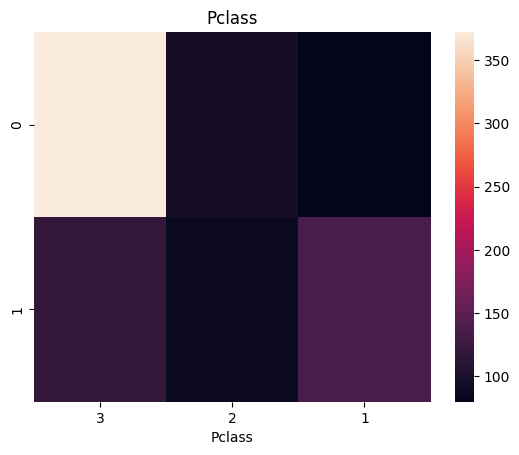

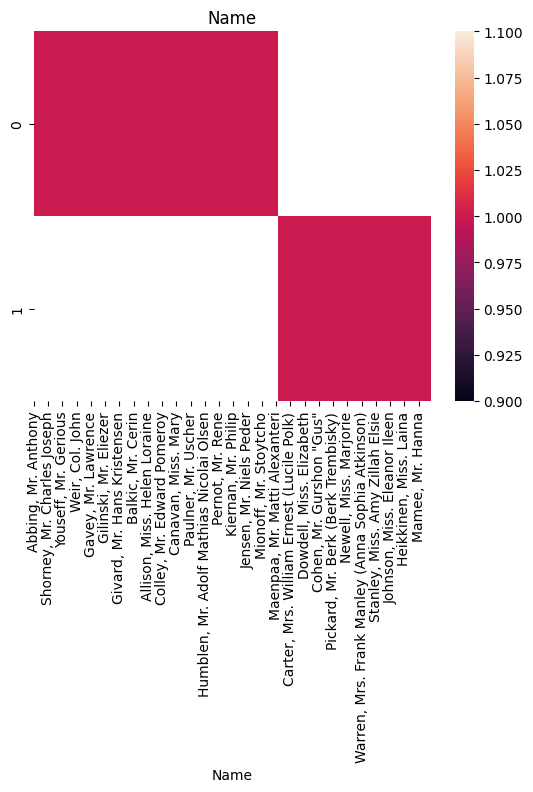

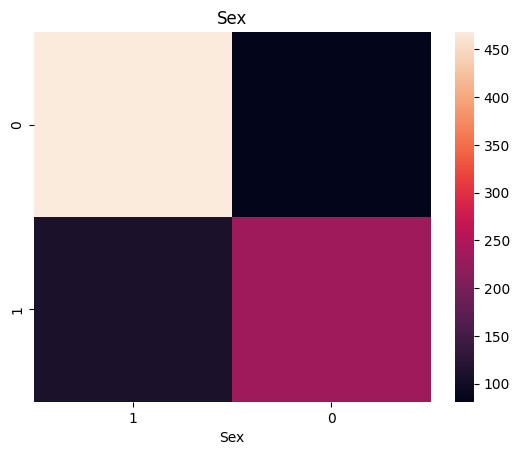

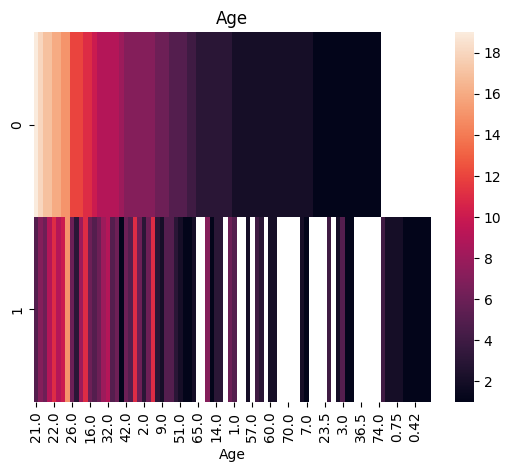

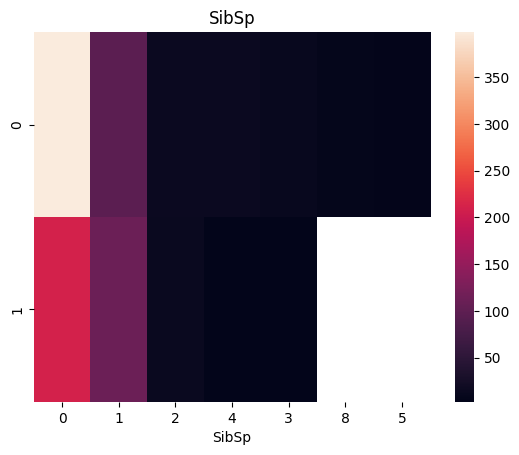

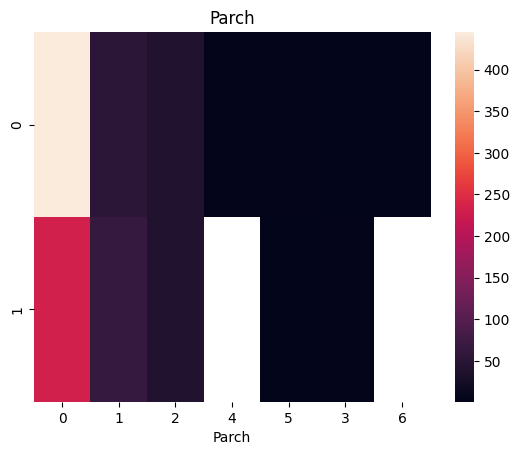

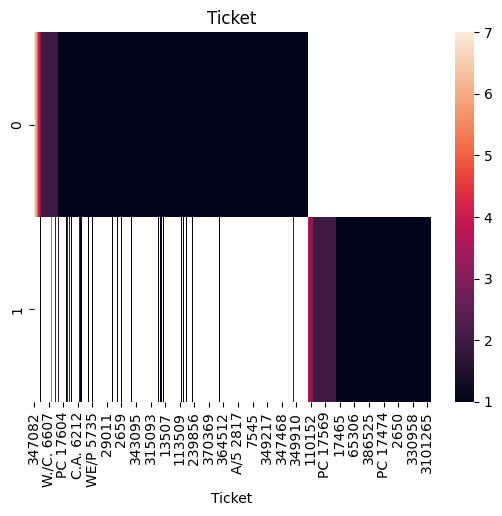

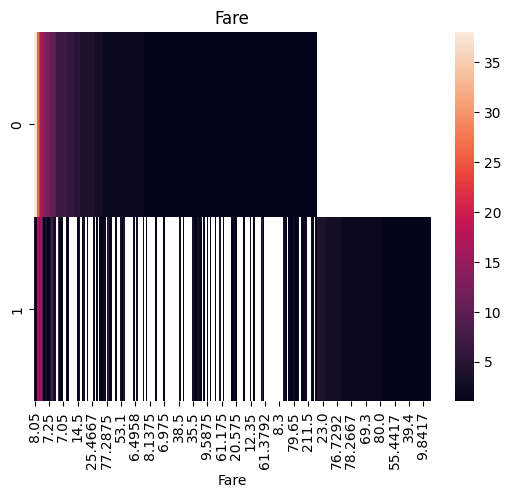

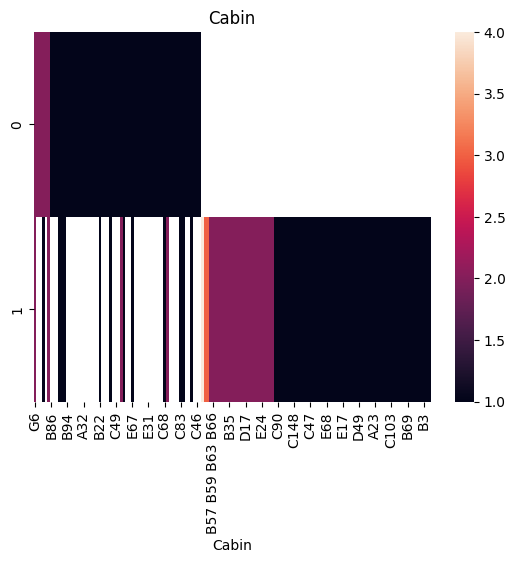

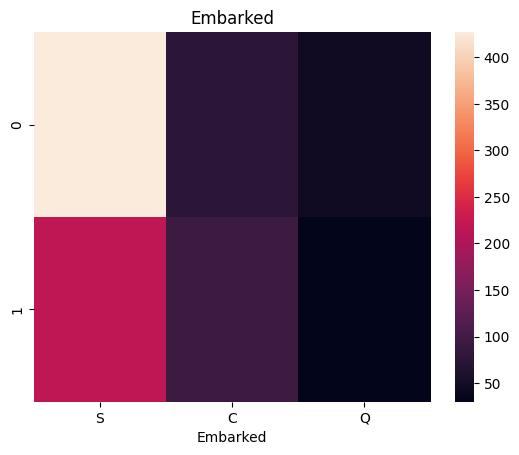

In [299]:
for col in T_data.columns:
    if col in ["Survived"]:
        continue
    if pd.api.types.is_number(T_data[col].dtype):
        continue
    s = T_data.groupby("Survived")[col].value_counts()
    plt.subplots()
    sns.heatmap(pd.DataFrame([s[0], s[1]], index=[0, 1])).set_title(col)


2. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [128]:
X, y = CS_dummies.drop("CSAT Score", axis=1), CS_dummies["CSAT Score"]
model = DecisionTreeClassifier().fit(X, y)

model.score(X, y)


0.8154050310219191

In [138]:
T_data

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


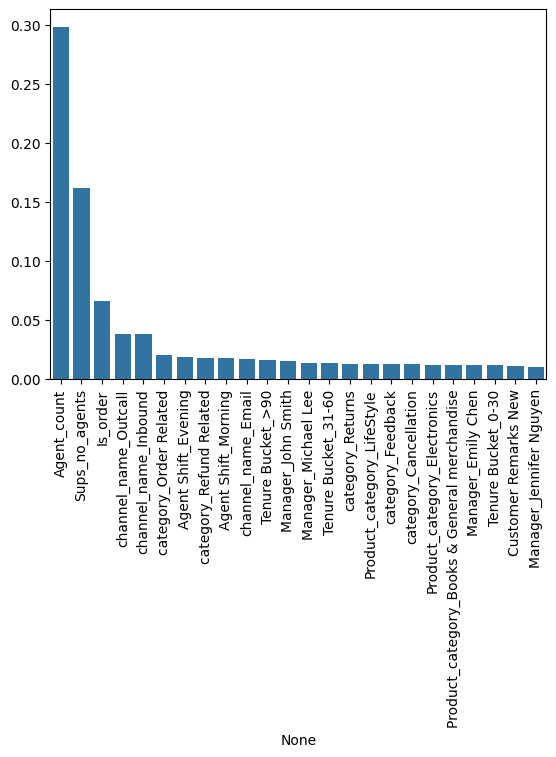

In [137]:
features = model.feature_importances_
mask = np.argsort(features)[::-1]
features = features[mask]
mask2 = features > 0.01
sns.barplot(x=X.columns[mask][mask2], y=features[mask2])
plt.xticks(rotation=90)
None

Видно что самые важные признаки:
- Agent_count
- Soups_no_agents
- Is_order

3. Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки. Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).

Разобьем титаник на две выборки

In [303]:
T_train, T_test = train_test_split(T_data)
T_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
659,0,1,"Newell, Mr. Arthur Webster",1,58.0,0,2,35273,113.2750,D48,C
324,0,3,"Sage, Mr. George John Jr",1,NaN,8,2,CA. 2343,69.5500,NaN,S
606,0,3,"Karaic, Mr. Milan",1,30.0,0,0,349246,7.8958,NaN,S
426,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",0,28.0,1,0,2003,26.0000,NaN,S
386,0,3,"Goodwin, Master. Sidney Leonard",1,1.0,5,2,CA 2144,46.9000,NaN,S


In [304]:
T_test

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
375,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",0,NaN,1,0,PC 17604,82.1708,NaN,C
133,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",0,29.0,1,0,228414,26.0000,NaN,S
858,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",0,24.0,0,3,2666,19.2583,NaN,C
533,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",0,NaN,0,2,2668,22.3583,NaN,C
273,0,1,"Natsch, Mr. Charles H",1,37.0,0,1,PC 17596,29.7000,C118,C
...,...,...,...,...,...,...,...,...,...,...,...
509,1,3,"Lang, Mr. Fang",1,26.0,0,0,1601,56.4958,NaN,S
485,0,3,"Lefebre, Miss. Jeannie",0,NaN,3,1,4133,25.4667,NaN,S
716,1,1,"Endres, Miss. Caroline Louise",0,38.0,0,0,PC 17757,227.5250,C45,C
25,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",0,38.0,1,5,347077,31.3875,NaN,S


Уберем билеты, каюты и имена, заменим NaN на 0, К `Embarked` применим get_dimmes

In [314]:
def transform(data):
    data = data.drop({"Name", "Cabin", 'Ticket'} & set(data.columns), axis=1)
    data = pd.get_dummies(data, columns=["Embarked"])
    data = data.fillna(0)
    return data


In [315]:
T_train = transform(T_train)
T_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
659,0,1,1,58.0,0,2,113.2750,True,False,False
324,0,3,1,0.0,8,2,69.5500,False,False,True
606,0,3,1,30.0,0,0,7.8958,False,False,True
426,1,2,0,28.0,1,0,26.0000,False,False,True
386,0,3,1,1.0,5,2,46.9000,False,False,True
...,...,...,...,...,...,...,...,...,...,...
737,1,1,1,35.0,0,0,512.3292,True,False,False
768,0,3,1,0.0,1,0,24.1500,False,True,False
322,1,2,0,30.0,0,0,12.3500,False,True,False
853,1,1,0,16.0,0,1,39.4000,False,False,True


Пусть $y=\left(x_1-a_1\right)^\alpha \cdot\left(x_2-a_2\right)^\beta$ - производственная функция фирмы, $y_0$ - запланированный объем выпуска, $p_1, p_2$ - цены факторов производства.

Функция Лагранжа в задаче оптимального поведения фирмы по Хиксу имеет вид:

Выберите один ответ:
- $L\left(x_1, x_2, \lambda\right)=p_1 \cdot x_1+p_2 \cdot x_2+\lambda \cdot\left(x_1-a_1\right)^\alpha \cdot\left(x_2-a_2\right)^\beta$
- $ L\left(x_1, x_2, \lambda\right)=\left(x_1-a_1\right)^\alpha \cdot\left(x_2-a_2\right)^\beta+\lambda \cdot\left[y_0-\left(p_1 \cdot x_1+p_2 \cdot x_2\right)\right]$
- $L\left(x_1, x_2, \lambda\right)=p_1 \cdot x_1+p_2 \cdot x_2+\left[y_0-\lambda \cdot\left(x_1-a_1\right)^\alpha \cdot\left(x_2-a_2\right)^\beta\right]$
- $L\left(x_1, x_2, \lambda\right)=p_1 \cdot x_1+p_2 \cdot x_2+\lambda \cdot\left(x_1-a_1\right)^{\alpha-1} \cdot\left(x_2-a_2\right)^{\beta-1}$
- $L\left(x_1, x_2, \lambda\right)=p_1 \cdot x_1+p_2 \cdot x_2+\lambda \cdot\left[y_0-\left(x_1-a_1\right)^\alpha \cdot\left(x_2-a_2\right)^\beta\right]$

$\partial Y\left(p_1, p_2, V\right) / \partial p_1=x_1^* \cdot \lambda$

In [317]:
T_test = transform(T_test)
T_test


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
375,1,1,0,0.0,1,0,82.1708,True,False,False
133,1,2,0,29.0,1,0,26.0000,False,False,True
858,1,3,0,24.0,0,3,19.2583,True,False,False
533,1,3,0,0.0,0,2,22.3583,True,False,False
273,0,1,1,37.0,0,1,29.7000,True,False,False
...,...,...,...,...,...,...,...,...,...,...
509,1,3,1,26.0,0,0,56.4958,False,False,True
485,0,3,0,0.0,3,1,25.4667,False,False,True
716,1,1,0,38.0,0,0,227.5250,True,False,False
25,1,3,0,38.0,1,5,31.3875,False,False,True


4. Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.

In [140]:
T_data.describe(include="all")

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891,891.000000,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,NaN,"Braund, Mr. Owen Harris",NaN,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,4,644
mean,445.000000,446.000000,0.383838,2.308642,NaN,0.647587,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,257.353842,0.486592,0.836071,NaN,0.477990,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,0.000000,1.000000,NaN,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,222.500000,223.500000,0.000000,2.000000,NaN,0.000000,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,445.000000,446.000000,0.000000,3.000000,NaN,1.000000,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,667.500000,668.500000,1.000000,3.000000,NaN,1.000000,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Посмотрим на распределение признаков

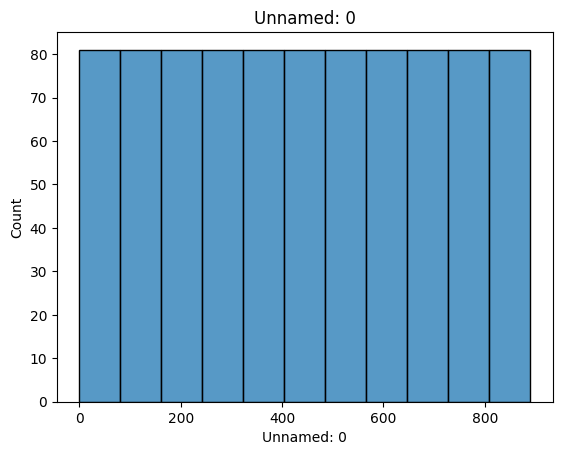

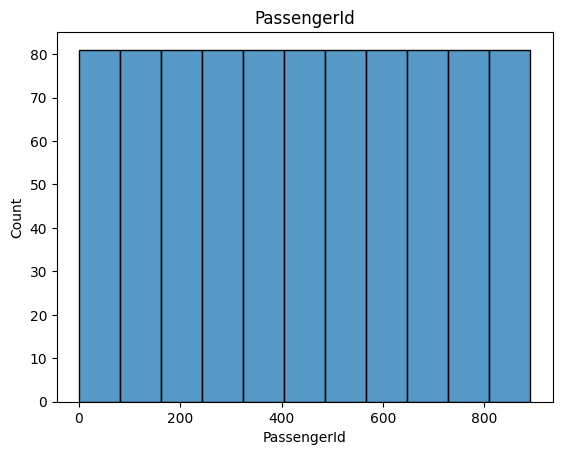

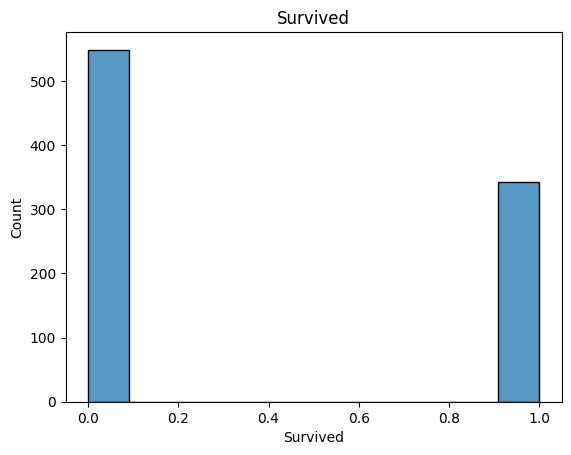

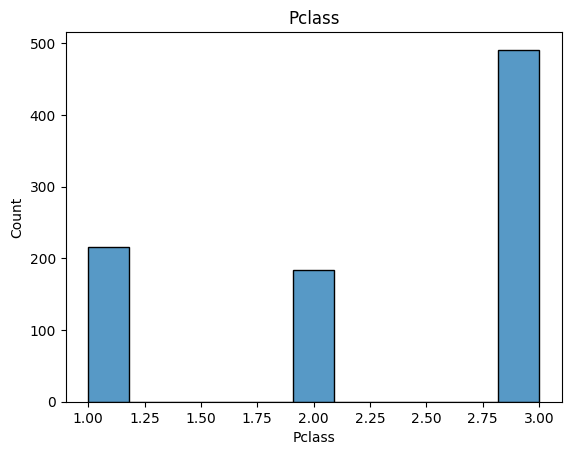

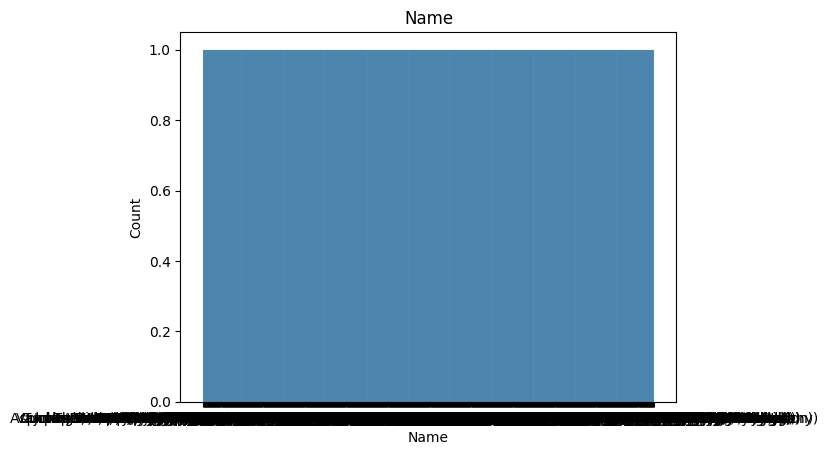

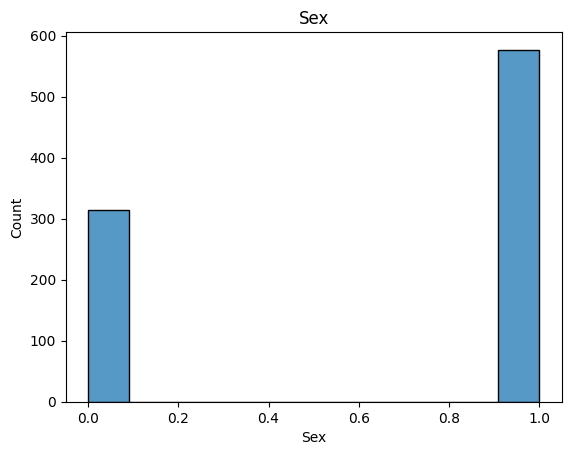

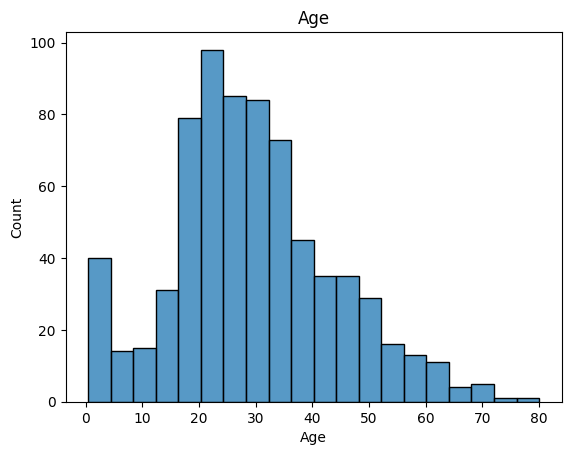

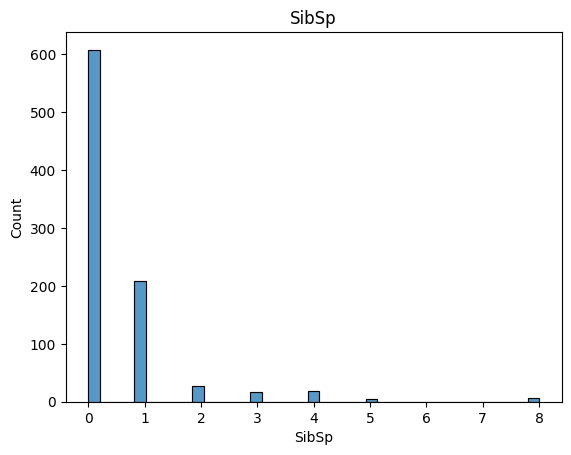

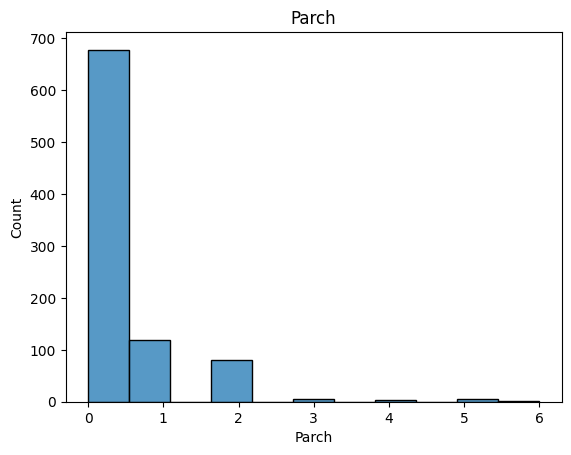

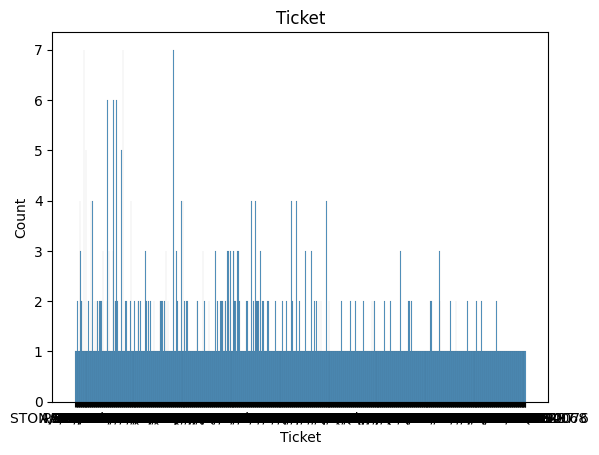

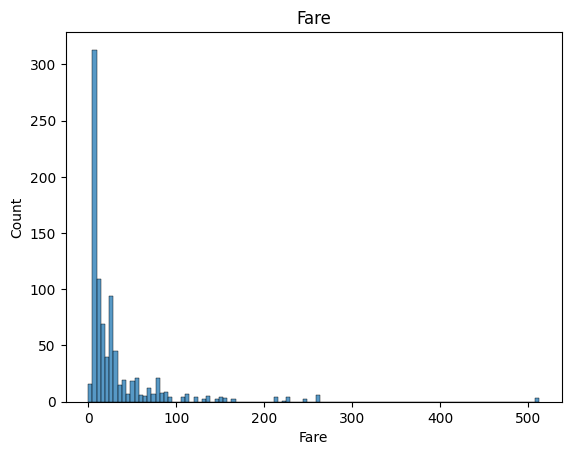

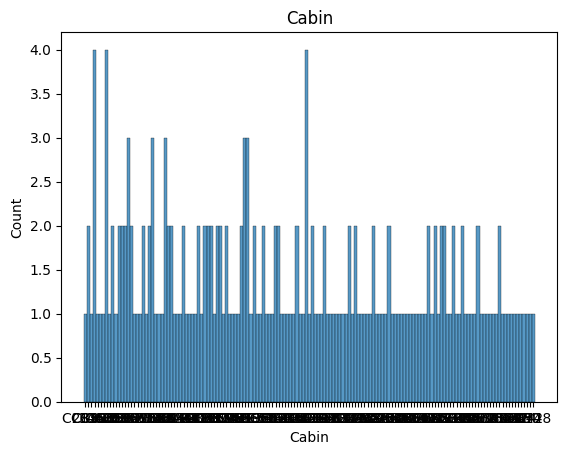

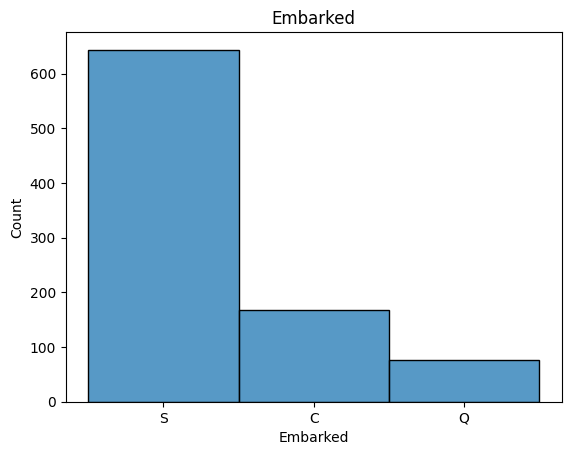

In [143]:
for col in T_data.columns:
    plt.subplots()
    sns.histplot(T_data, x=col).set_title(col)

- Среди билетов больше всего дешевых
- Больше всего людей путишествует по одиночке, и чем больше людей в семье, тем меньше таких семей
- Возраст распределен равномерно, (NaN не учитываем)

Text(0.5, 1.0, 'Цены на билеты')

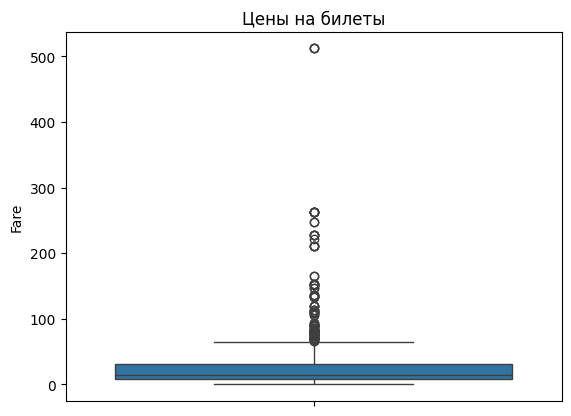

In [153]:
sns.boxplot(T_data.Fare).set_title("Цены на билеты")

Посмотрим на количество кают с разным количеством людей

<Axes: xlabel='count', ylabel='count'>

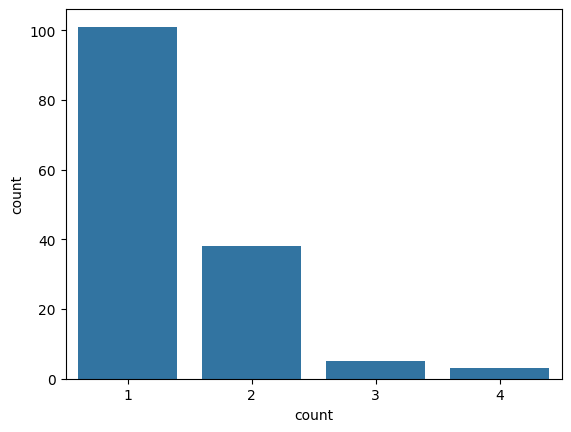

In [148]:
sns.barplot(T_data.Cabin.value_counts().value_counts())

Видно, что больше всего кают с одним человеком, меньше с двумя, и совсем мало с 3 и 4

5. Проверьте целесообразность каждого необязательного преобразования данных путем проверки, увеличивает ли данное преобразование точность модели. Проверьте на простом виде модели (линейная регрессия, дерево решений или случайный лес). Поэкспериментируйте с различными вариантами преобразований.

In [161]:
T_data = T_data.drop(columns={"Unnamed: 0", "PassengerId"} & set(T_data.columns))

In [180]:
def check(data1, data2, target):
    result = {"До преобразования": [], "После преобразования": []}
    indexes = []
    for model_type in (
        LogisticRegression,
        RandomForestClassifier,
        DecisionTreeClassifier,
    ):
        indexes.append(model_type.__name__)
        model = model_type().fit(data1.drop(target, axis=1), data1[target])
        result["До преобразования"].append(
            model.score(data1.drop(target, axis=1), data1[target])
        )
        model = model_type().fit(data2.drop(target, axis=1), data2[target])
        result["После преобразования"].append(
            model.score(data2.drop(target, axis=1), data2[target])
        )
    display(pd.DataFrame(result, index=indexes))

Уберем категориальные колонки где все значения различны

In [212]:
dataset = T_data.drop(columns=["Name", "Ticket"])
dataset


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,NaN,1,2,23.4500,NaN,S
889,1,1,1,26.0,0,0,30.0000,C148,C


В каюты зададим их частоту, точность немного выросла

In [210]:
data = dataset.copy().drop("Embarked", axis=1)
data["Cabin"] = data["Cabin"].map(data["Cabin"].value_counts())
data = data.fillna(0)

check(dataset.drop(["Embarked", "Cabin"], axis=1).fillna(0), data, "Survived")


,До преобразования,После преобразования
LogisticRegression,0.789001,0.804714
RandomForestClassifier,0.980920,0.985410
DecisionTreeClassifier,0.982043,0.986532


Преобразование `Embarked` в dummies переменные улучшает регрессию, но не деревья

In [230]:
check(
    dataset.drop(["Embarked", "Cabin"], axis=1).fillna(0),
    pd.get_dummies(dataset.drop(["Cabin"], axis=1)).fillna(0),
    # T_dummies.drop(["Name", "Ticket", "Cabin"], axis=1).fillna(0),
    "Survived",
)


,До преобразования,После преобразования
LogisticRegression,0.789001,0.794613
RandomForestClassifier,0.982043,0.982043
DecisionTreeClassifier,0.982043,0.982043


Сделаем оба преобразования, точность выросла

In [232]:
data = dataset.copy()
data = pd.get_dummies(data, columns=["Embarked"])
data["Cabin"] = data["Cabin"].map(data["Cabin"].value_counts())
data = data.fillna(0)

check(dataset.drop(["Embarked", "Cabin"], axis=1).fillna(0), data, "Survived")


,До преобразования,После преобразования
LogisticRegression,0.789001,0.801347
RandomForestClassifier,0.982043,0.986532
DecisionTreeClassifier,0.982043,0.986532


6. Создайте воспроизводимый код обработки данного датасета.

Весь предыдущий код воспроизводим 😃